In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ZGlobalLib.gpu_utils import use_gpu
use_gpu(1)

2023-11-17 13:22:38.720823: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')

2023-11-17 13:22:39.173599: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9651 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:68:00.0, compute capability: 7.5


In [3]:
from histolungs import *

# Test

# Evaluation

In [9]:
def train_evaluate(class_type, resolution,
                   public_directory = 'data/public_dataset/',
                   root_directory = "data/dataset_2_final/", 
                   test_directory = "data/validation_final_septiembre/",
                   pretrain_dir = None,
                   exclude_pd = False
                  ):
    
    if resolution == 'public':
        root_directory = public_directory
    
    resname = resolution if resolution is not None else 'all'
    
    image_paths = get_files(root_directory, resolution=resolution, exclude_pd=exclude_pd)
    class_names, class2int, labels = get_classes_labels(root_directory, image_paths, class_type, exclude_pd=exclude_pd)
    
    num_classes = len(class2int)
    
    display_markdown(f'## Evaluating {resname} resolution, {num_classes} classes, exc pd {exclude_pd}', raw=True)
    
    train_generator, val_generator = get_generators(image_paths, labels, num_classes=num_classes, resolution=resolution)
    class_weights = compute_weights(train_generator)

    model = get_model(num_classes, resolution=resolution)
    
    if pretrain_dir is not None:
        model.load_weights(pretrain_dir)
    
    MODEL_NAME = f'Ef0_{resname}_{num_classes}_classes_excpd{int(exclude_pd)}'
    RUN_NAME = ''
    log_dir = f'logs/{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}/{MODEL_NAME}{RUN_NAME}'
    print(log_dir)
    
    history = train_model(model, train_generator, val_generator, num_classes, class_weights, log_dir)
    
    plot_metrics(history, log_dir)
    
    test_gen = get_test_generator(class2int, resolution, log_dir, exclude_pd=exclude_pd, test_directory=test_directory)
    test_model(model, test_gen, log_dir, class_names)

## Evaluating 20x resolution, 3 classes, exc pd True

  0%|          | 0/34 [00:00<?, ?it/s]

logs/20231117-133307/Ef0_20x_3_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

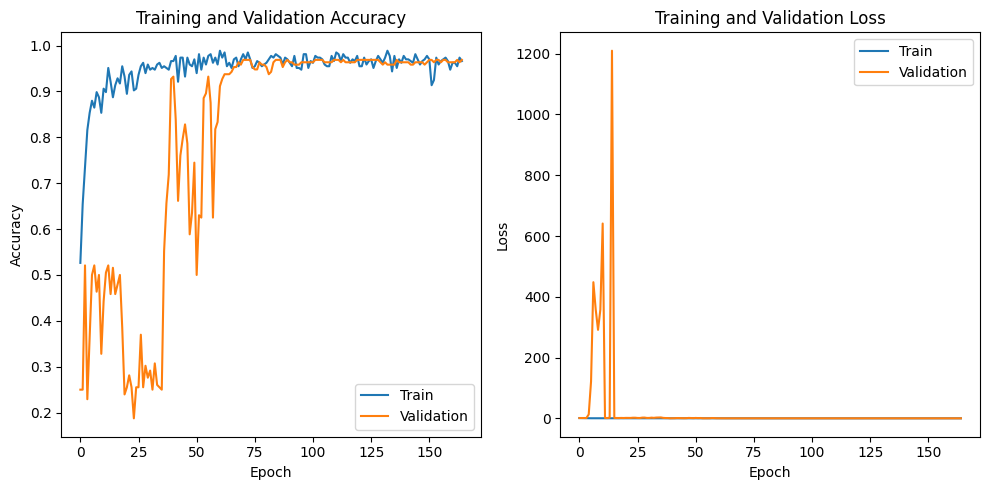

Test Accuracy: 0.73
Test Precision: 0.7381766381766383
Test Recall: 0.775


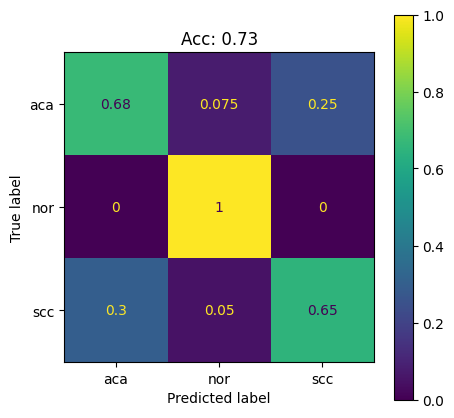

## Evaluating 20x resolution, 3 classes, exc pd False

  0%|          | 0/44 [00:00<?, ?it/s]

logs/20231117-141202/Ef0_20x_3_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

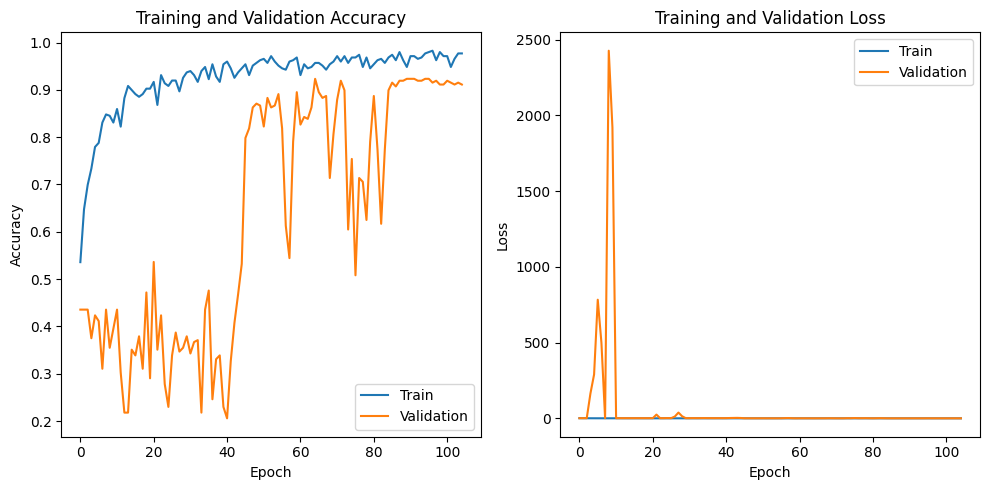

Test Accuracy: 0.7928571428571428
Test Precision: 0.798012298012298
Test Recall: 0.7944444444444444


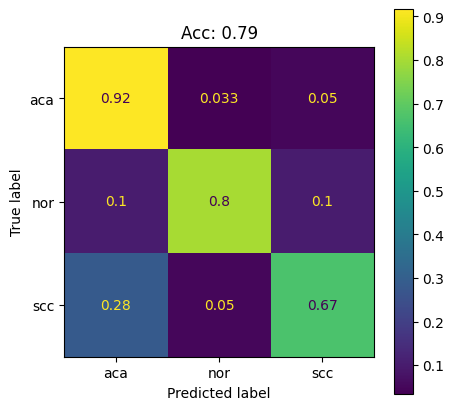

## Evaluating 20x resolution, 5 classes, exc pd True

  0%|          | 0/34 [00:00<?, ?it/s]

logs/20231117-144342/Ef0_20x_5_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

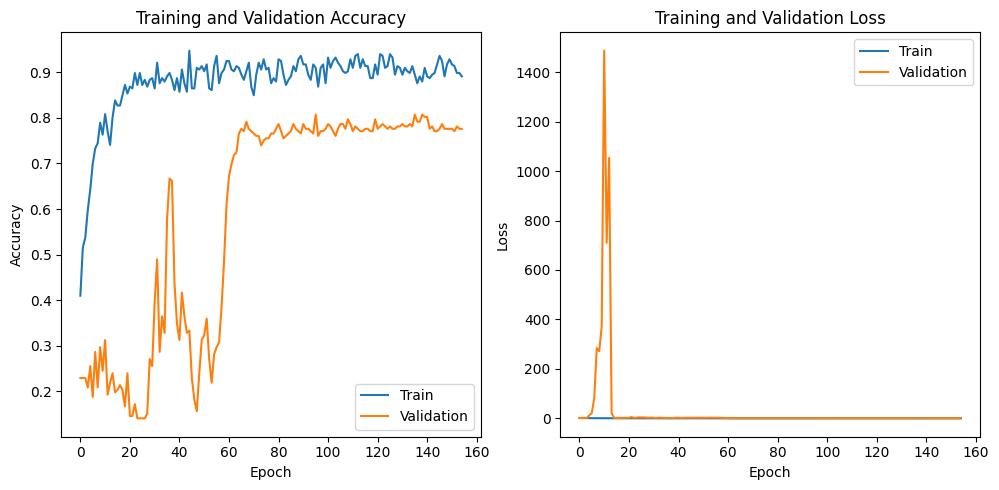

Test Accuracy: 0.46
Test Precision: 0.44465201465201465
Test Recall: 0.4600000000000001


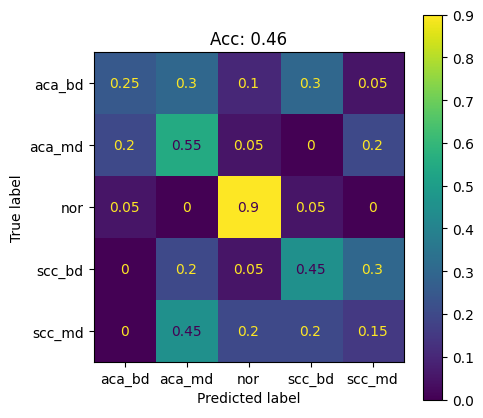

## Evaluating 20x resolution, 7 classes, exc pd False

  0%|          | 0/44 [00:00<?, ?it/s]

logs/20231117-152023/Ef0_20x_7_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

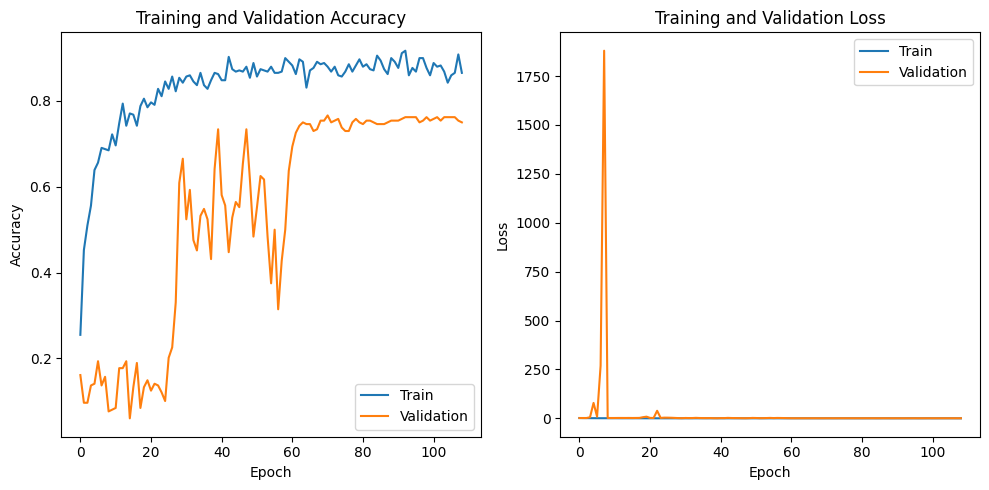

Test Accuracy: 0.5571428571428572
Test Precision: 0.5101965882138295
Test Recall: 0.557142857142857


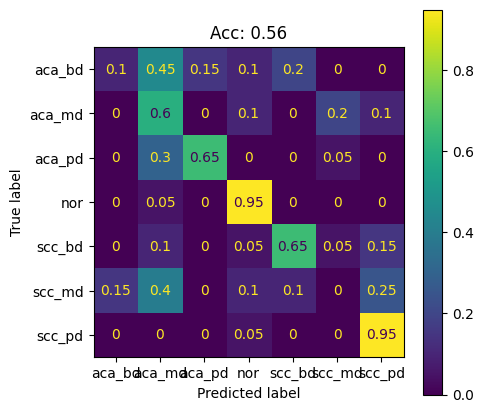

## Evaluating 40x resolution, 3 classes, exc pd True

  0%|          | 0/29 [00:00<?, ?it/s]

logs/20231117-155316/Ef0_40x_3_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

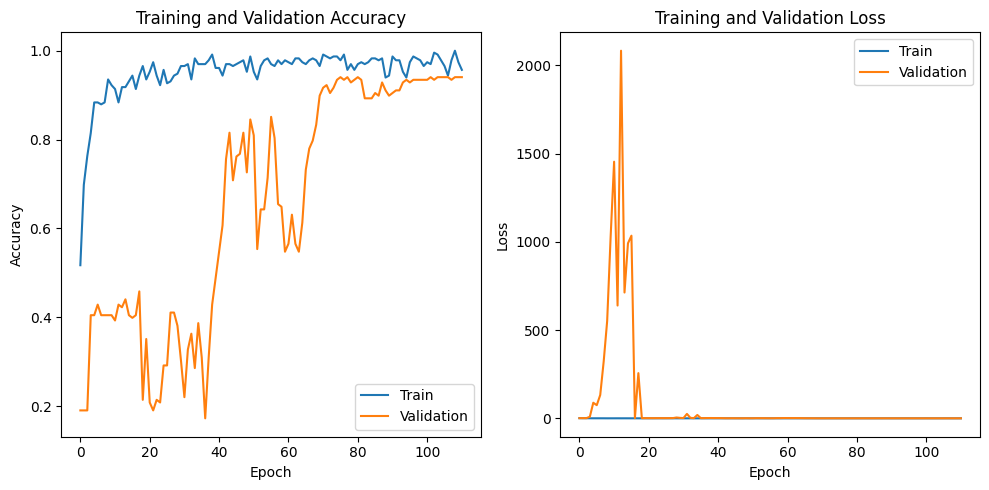

Test Accuracy: 0.73
Test Precision: 0.726911976911977
Test Recall: 0.6916666666666668


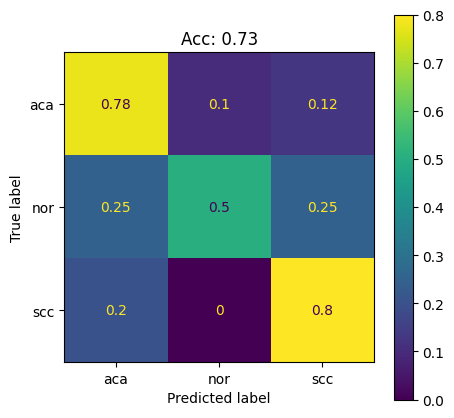

## Evaluating 40x resolution, 3 classes, exc pd False

  0%|          | 0/40 [00:00<?, ?it/s]

logs/20231117-161546/Ef0_40x_3_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

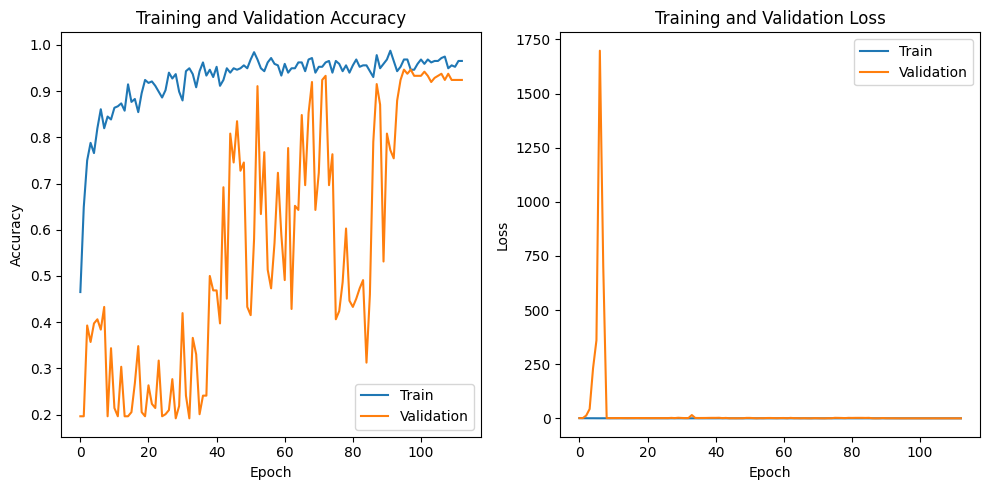

Test Accuracy: 0.6857142857142857
Test Precision: 0.7045617045617045
Test Recall: 0.7000000000000001


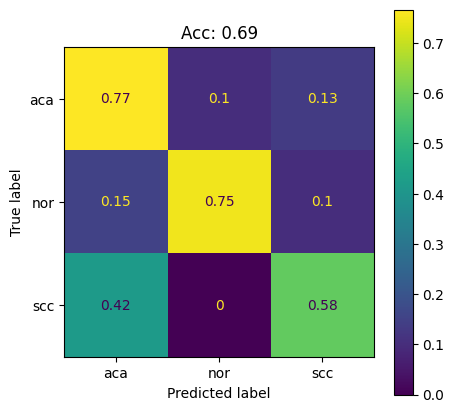

## Evaluating 40x resolution, 5 classes, exc pd True

  0%|          | 0/29 [00:00<?, ?it/s]

logs/20231117-164553/Ef0_40x_5_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

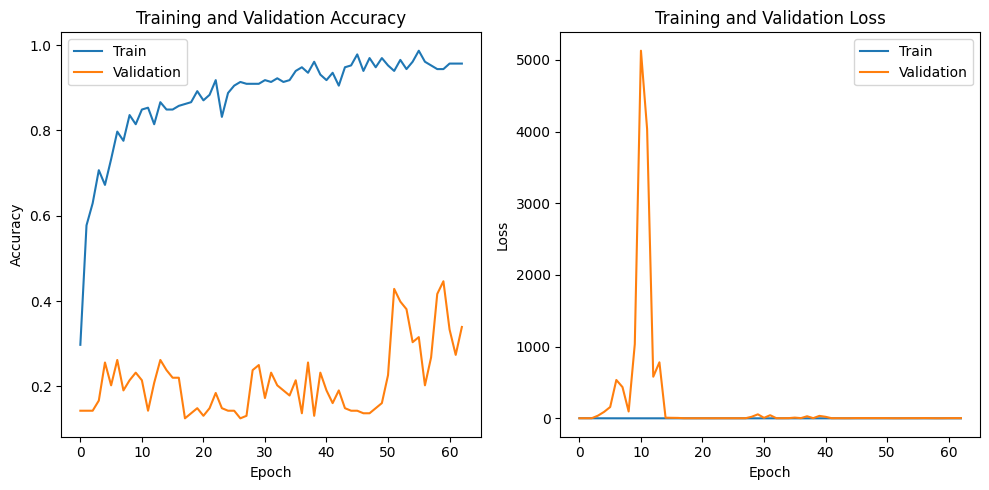

/opt/miniconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.2
Test Precision: 0.07375886524822695
Test Recall: 0.2


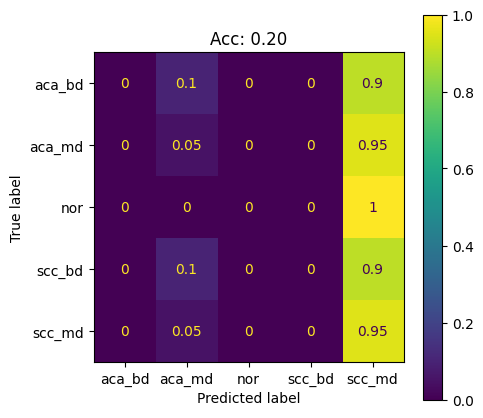

## Evaluating 40x resolution, 7 classes, exc pd False

  0%|          | 0/40 [00:00<?, ?it/s]

logs/20231117-165853/Ef0_40x_7_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

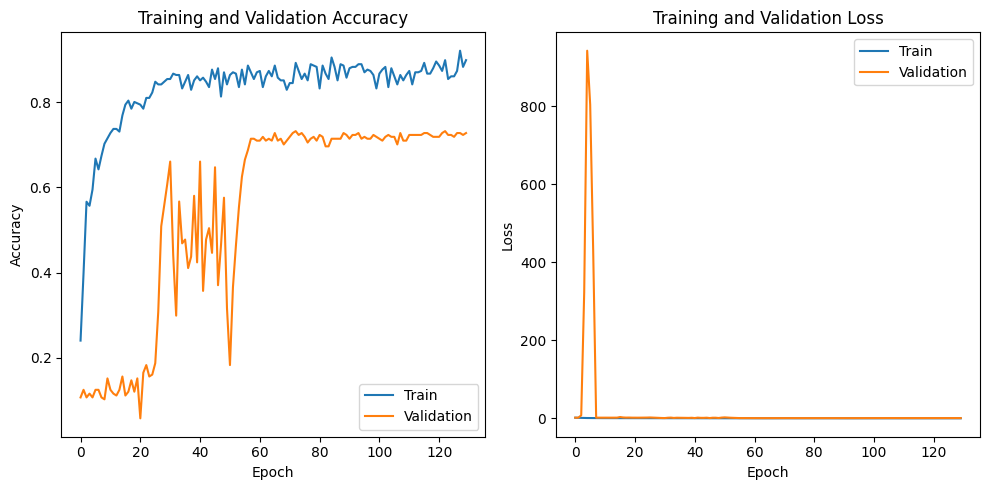

Test Accuracy: 0.44285714285714284
Test Precision: 0.5038281489507347
Test Recall: 0.4428571428571429


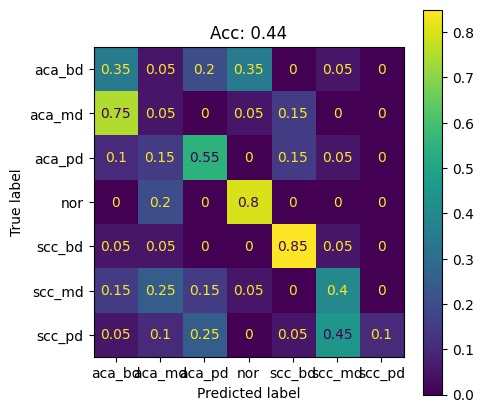

## Evaluating all resolution, 3 classes, exc pd True

  0%|          | 0/63 [00:00<?, ?it/s]

logs/20231117-173342/Ef0_all_3_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

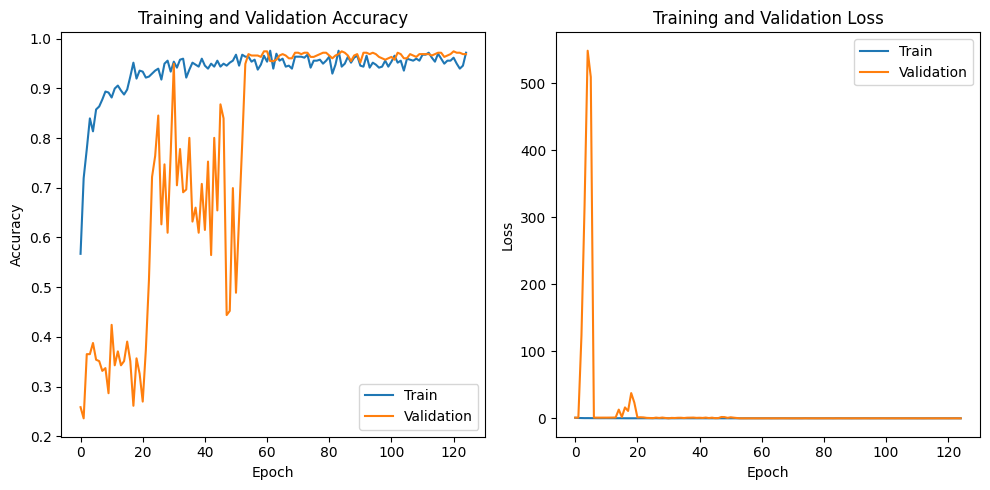

Test Accuracy: 0.745
Test Precision: 0.756980056980057
Test Recall: 0.7666666666666666


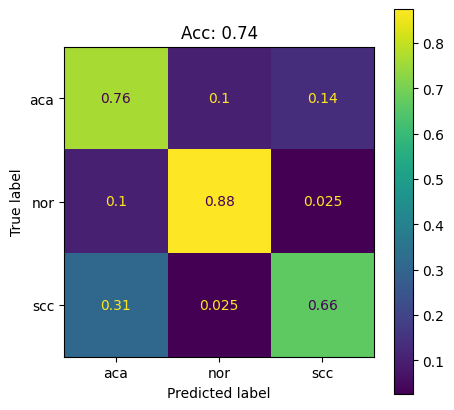

## Evaluating all resolution, 3 classes, exc pd False

  0%|          | 0/84 [00:00<?, ?it/s]

logs/20231117-182545/Ef0_all_3_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
for resolution, classes, poco_dif in [('20x', ['macro','micro'], [True, False]), 
                                      ('40x', ['macro','micro'], [True, False]), 
                                      (None, ['macro','micro'], [True, False]), 
                                      ('public', ['macro'], [False])]:
    for class_type in classes:
        for exclude_pd in poco_dif:
            # for pretrain_dir in pretrains:
            train_evaluate(class_type=class_type, resolution=resolution, exclude_pd=exclude_pd)

## Evaluating 20x resolution, 3 classes, exc pd True

  0%|          | 0/9 [00:00<?, ?it/s]

logs/20231116-184242/Ef0_20x_3_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2023-11-16 18:42:51.352286: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


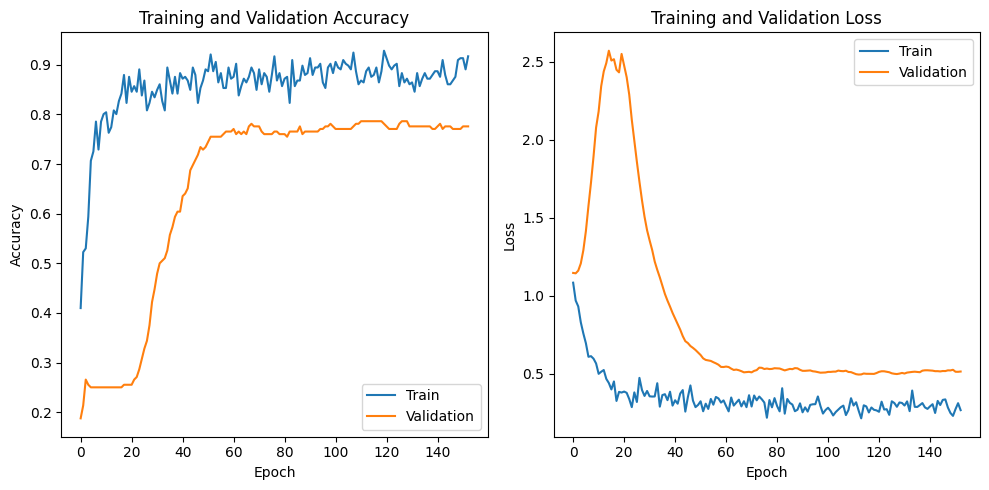

Test Accuracy: 0.56
Test Precision: 0.5867320261437908
Test Recall: 0.6166666666666667


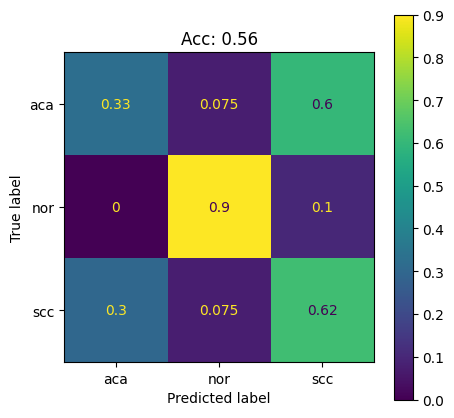

## Evaluating 20x resolution, 3 classes, exc pd False

  0%|          | 0/11 [00:00<?, ?it/s]

logs/20231116-190547/Ef0_20x_3_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

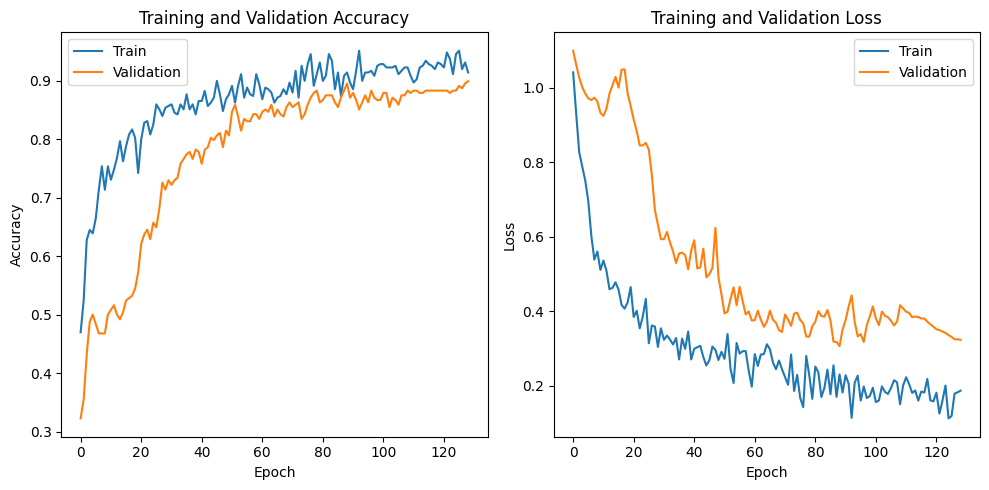

Test Accuracy: 0.6857142857142857
Test Precision: 0.7196321700871752
Test Recall: 0.7444444444444445


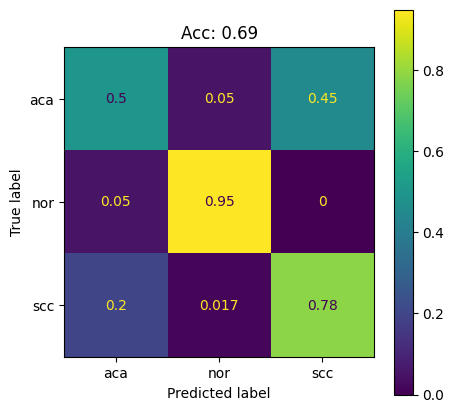

## Evaluating 20x resolution, 5 classes, exc pd True

  0%|          | 0/9 [00:00<?, ?it/s]

logs/20231116-192916/Ef0_20x_5_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

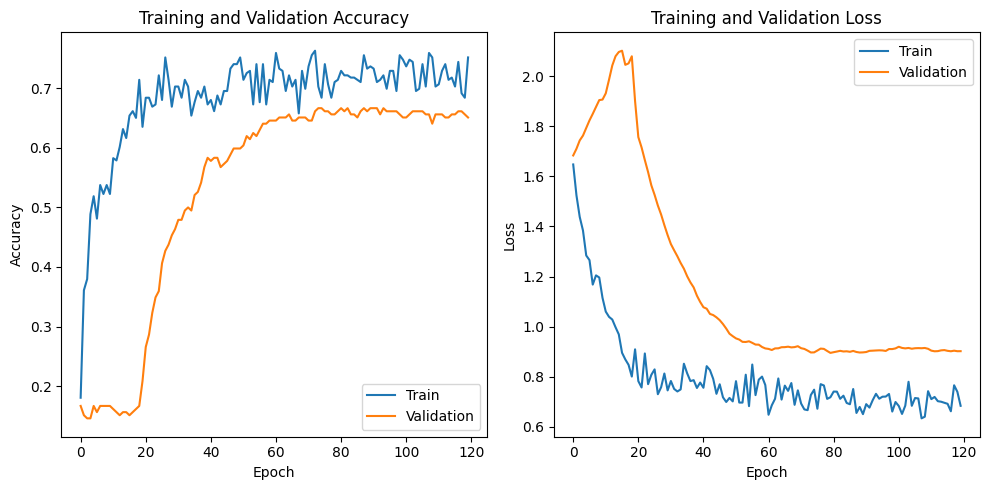

Test Accuracy: 0.39
Test Precision: 0.3907407407407407
Test Recall: 0.39


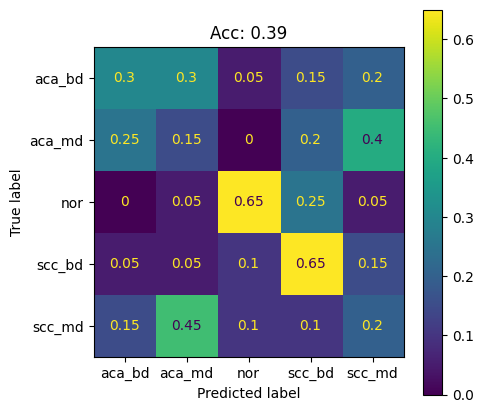

## Evaluating 20x resolution, 7 classes, exc pd False

  0%|          | 0/11 [00:00<?, ?it/s]

logs/20231116-194650/Ef0_20x_7_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

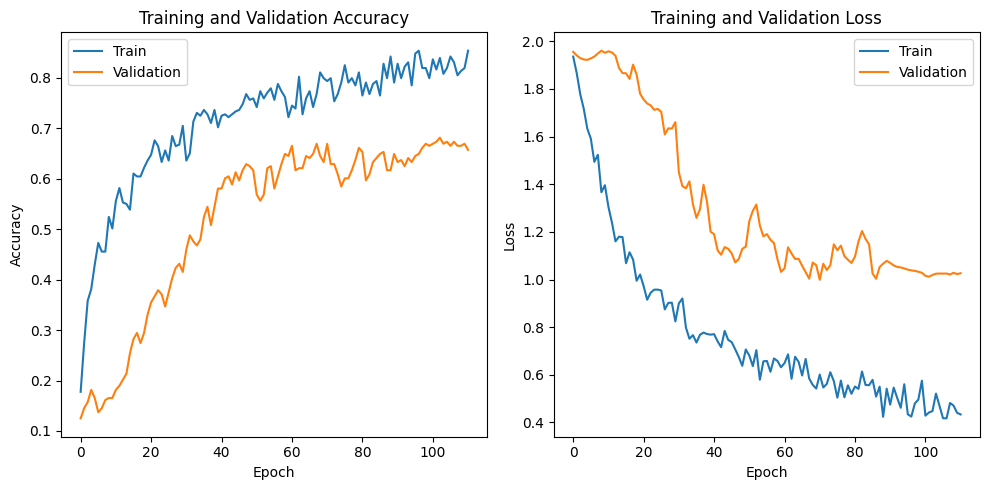

Test Accuracy: 0.40714285714285714
Test Precision: 0.38095050219251275
Test Recall: 0.40714285714285714


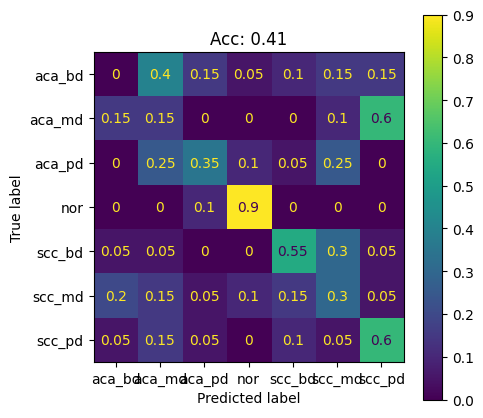

## Evaluating 40x resolution, 3 classes, exc pd True

  0%|          | 0/8 [00:00<?, ?it/s]

logs/20231116-200647/Ef0_40x_3_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

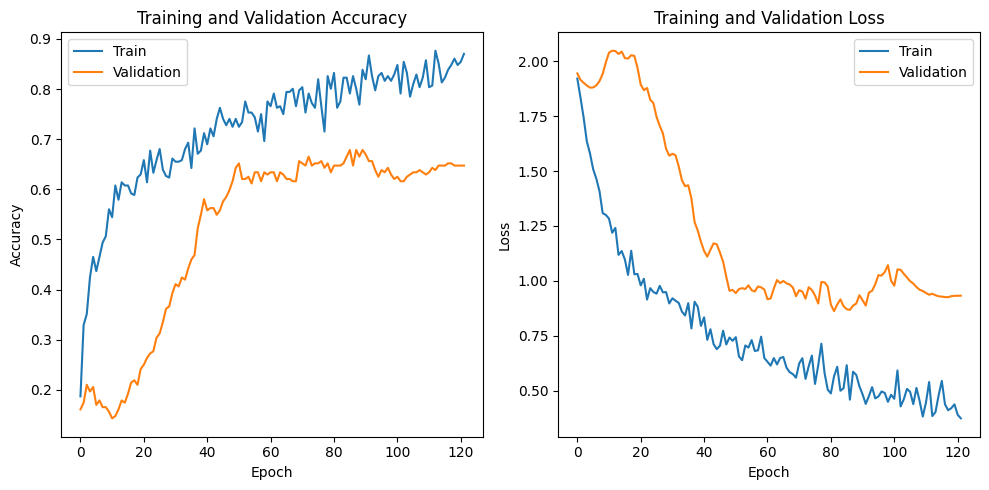

Test Accuracy: 0.4
Test Precision: 0.37033204890347743
Test Recall: 0.39999999999999997


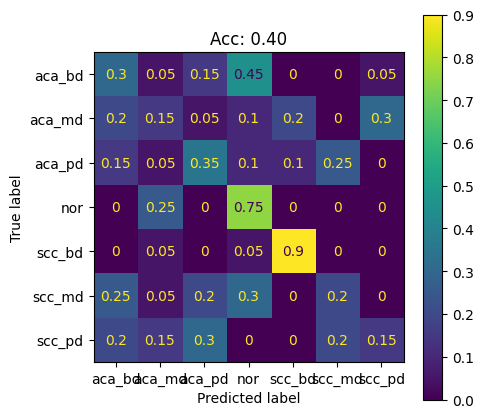

## Evaluating all resolution, 3 classes, exc pd True

  0%|          | 0/16 [00:00<?, ?it/s]

logs/20231116-210535/Ef0_all_3_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

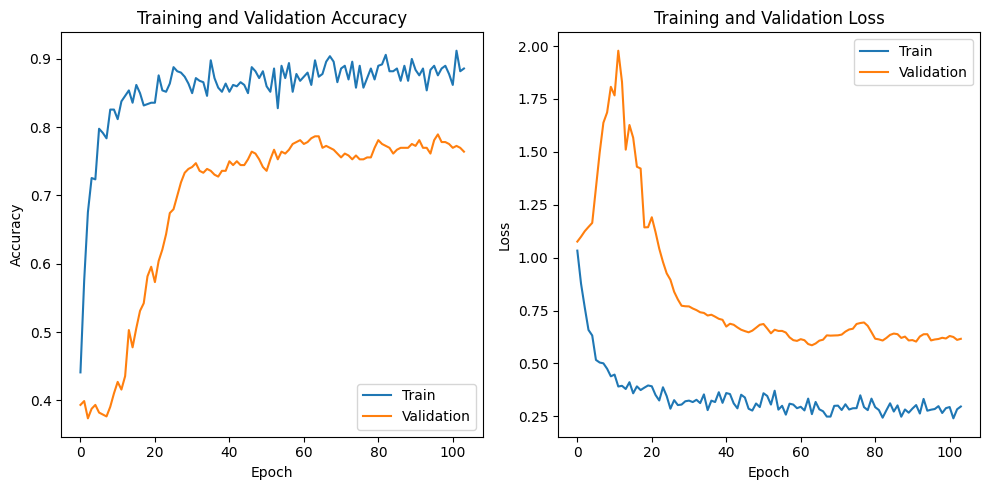

Test Accuracy: 0.565
Test Precision: 0.5953043965110797
Test Recall: 0.5750000000000001


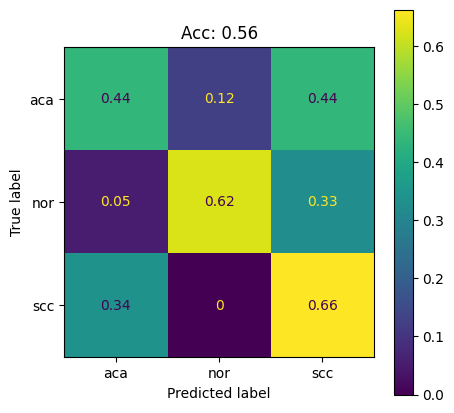

## Evaluating all resolution, 3 classes, exc pd False

  0%|          | 0/21 [00:00<?, ?it/s]

logs/20231116-213027/Ef0_all_3_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

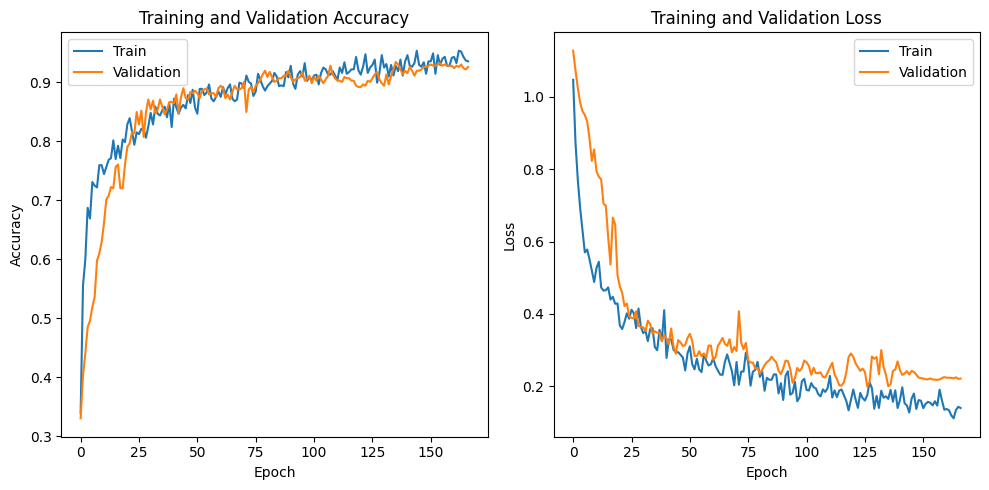

Test Accuracy: 0.6642857142857143
Test Precision: 0.670977564102564
Test Recall: 0.7166666666666668


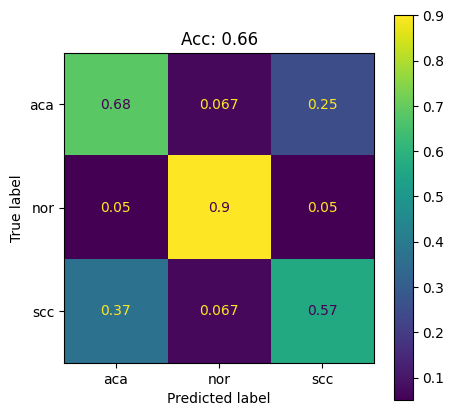

## Evaluating all resolution, 5 classes, exc pd True

  0%|          | 0/16 [00:00<?, ?it/s]

logs/20231116-222147/Ef0_all_5_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

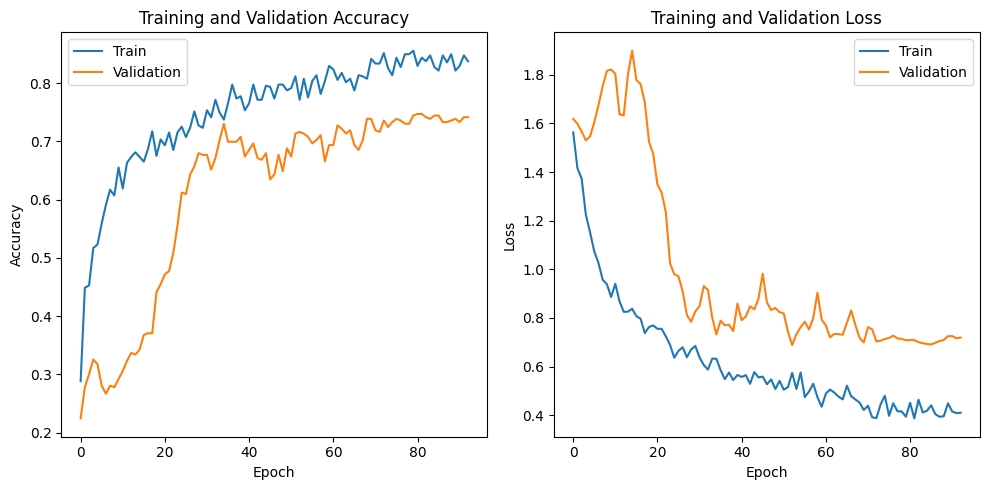

Test Accuracy: 0.41
Test Precision: 0.3897174856284074
Test Recall: 0.41


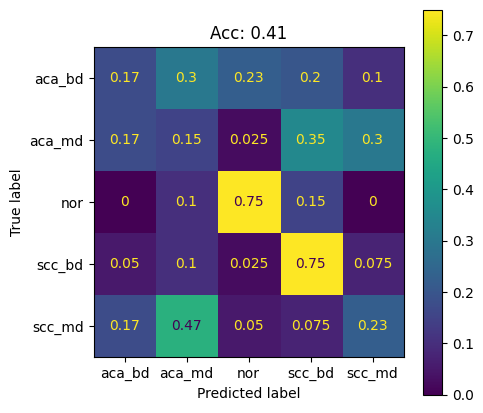

## Evaluating all resolution, 7 classes, exc pd False

  0%|          | 0/21 [00:00<?, ?it/s]

logs/20231116-224411/Ef0_all_7_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

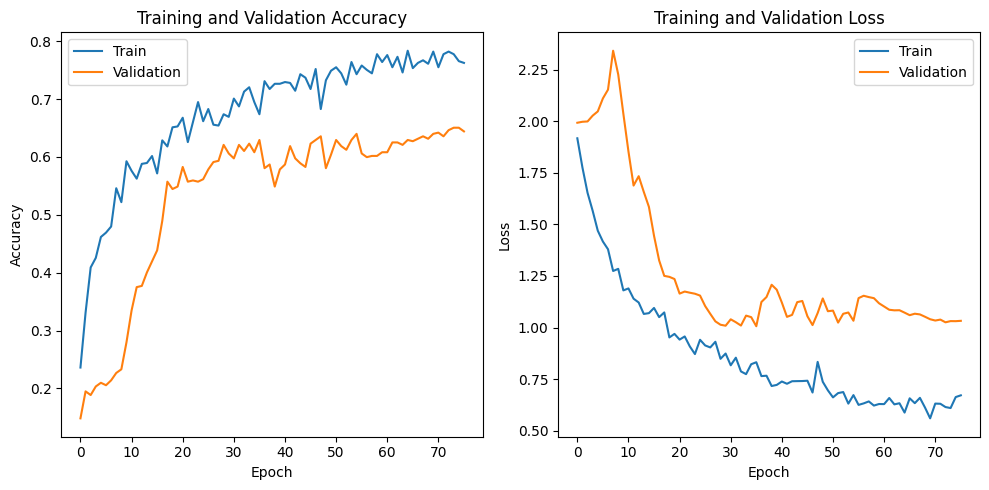

Test Accuracy: 0.45
Test Precision: 0.4225962016012078
Test Recall: 0.45000000000000007


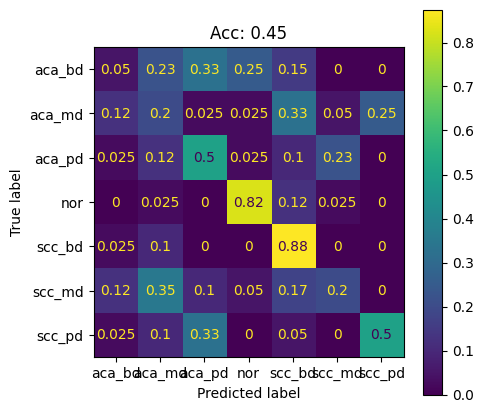

## Evaluating public resolution, 3 classes, exc pd False

  0%|          | 0/100 [00:00<?, ?it/s]

logs/20231116-230935/Ef0_public_3_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2023-11-16 23:09:44.673935: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 610.01MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-11-16 23:09:44.673979: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 610.01MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



ResourceExhaustedError: Graph execution error:

Detected at node 'model_12/efficientnetb0/block2b_dwconv/depthwise' defined at (most recent call last):
    File "/opt/miniconda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/miniconda/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/miniconda/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/opt/miniconda/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/miniconda/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/opt/miniconda/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/opt/miniconda/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_58074/682342500.py", line 8, in <module>
      train_evaluate(class_type=class_type, resolution=resolution, exclude_pd=exclude_pd)
    File "/tmp/ipykernel_58074/487503606.py", line 34, in train_evaluate
      history = train_model(model, train_generator, val_generator, num_classes, class_weights, log_dir)
    File "/notebooks/Lungs/histolungs.py", line 309, in train_model
      ]
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/layers/convolutional.py", line 2766, in call
      outputs = backend.depthwise_conv2d(
    File "/opt/miniconda/lib/python3.9/site-packages/keras/backend.py", line 5901, in depthwise_conv2d
      x = tf.compat.v1.nn.depthwise_conv2d(
Node: 'model_12/efficientnetb0/block2b_dwconv/depthwise'
Detected at node 'model_12/efficientnetb0/block2b_dwconv/depthwise' defined at (most recent call last):
    File "/opt/miniconda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/miniconda/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/miniconda/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/opt/miniconda/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/miniconda/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/opt/miniconda/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/opt/miniconda/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/miniconda/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_58074/682342500.py", line 8, in <module>
      train_evaluate(class_type=class_type, resolution=resolution, exclude_pd=exclude_pd)
    File "/tmp/ipykernel_58074/487503606.py", line 34, in train_evaluate
      history = train_model(model, train_generator, val_generator, num_classes, class_weights, log_dir)
    File "/notebooks/Lungs/histolungs.py", line 309, in train_model
      ]
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/opt/miniconda/lib/python3.9/site-packages/keras/layers/convolutional.py", line 2766, in call
      outputs = backend.depthwise_conv2d(
    File "/opt/miniconda/lib/python3.9/site-packages/keras/backend.py", line 5901, in depthwise_conv2d
      x = tf.compat.v1.nn.depthwise_conv2d(
Node: 'model_12/efficientnetb0/block2b_dwconv/depthwise'
2 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[128,144,63,63] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_12/efficientnetb0/block2b_dwconv/depthwise}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[assert_less_equal_4/Assert/AssertGuard/pivot_f/_93/_343]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[128,144,63,63] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_12/efficientnetb0/block2b_dwconv/depthwise}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_63062718]

In [5]:
for resolution, classes, poco_dif in [('20x', ['macro','micro'], [True, False]), 
                                      ('40x', ['macro','micro'], [True, False]), 
                                      (None, ['macro','micro'], [True, False]), 
                                      ('public', ['macro'], [False])]:
    for class_type in classes:
        for exclude_pd in poco_dif:
            # for pretrain_dir in pretrains:
            train_evaluate(class_type=class_type, resolution=resolution, exclude_pd=exclude_pd)